# The auction algorithm

## Outline
1. [The assignment problem](#assignment)
2. [The auction algorithm for the assignment problem](#auction-a)
3. [The auction algorithm for the shortest path problem](#auction-p)

## <a name="assignment"></a> The assignment problem

Given affinities $(a_{ij})_{ij}$ between persons and objects, the most direct formulation of the assignment problem is the following:

$$
\begin{align}
\text{maximize}_{\sigma \in \mathfrak{S}} \quad & \sum_i a_{i\sigma(i)}
\end{align}
$$

We can however show using complementary slackness that the solution to the following linear program coincides with that of the assignment problem:

$$
\begin{align}
\text{maximize}_{\pi \geq 0} \quad & \sum_{ij} \pi_{ij} a_{ij} \\
\text{subject to} \quad & \sum_i \pi_{ij} = 1 \\
& \sum_j \pi_{ij} = 1
\end{align}
$$

Investigating the dual of this problem, observe we can get rid of an extraneous variable and simplify the problem (using complementary slackness again):

$$
\begin{align}
\text{minimize} \quad & \sum_i q_i + \sum_j p_j \\
\text{subject to} \quad & q_i + p_j \geq a_{ij}
\end{align}
$$

becomes:

$$
\begin{align}
\text{minimize} \quad & \sum_i \max_j \lbrace a_{ij} - p_{j} \rbrace + \sum_j p_j
\end{align}
$$

The different representations for the assignment problem have led to several different algorithms. These algorithms usually focus on optimizing either the primal cost $\sum_{ij} \pi_{ij} a_{ij}$ or the dual cost $\sum_i \max_j \lbrace a_{ij} - p_{j} \rbrace + \sum_j p_j$.

## <a name="auction-a"></a> The auction algorithm for the assignment problem

The auction algorithm is a very human algorithm for the assignment problem. It is mathematically peculiar in the sense that it optimizes neither the primal cost nor the dual, but terminates with an optimal solution for the assignment problem. At every step of the auction algorithm:
1. Persons with no object place bids on the object they prefer
2. Prices for objects are adjusted to the best bid they received
3. Objects are assigned to those who offered the best bid

The algorithm terminates when everyone has an object.

To obtain a precise procedure we must of course define the subjective value of an object and give a formula for the calculation of bids, but we can already make some observations:
1. Since bids during auctions are always best bids, object prices can never decrease
2. Any time a person is assigned an object, this object is their favorite object, and assuming the subjective value of an object is decreasing in its price, observation (1) implies this object will remain the person's favorite so long as they are matched
3. If the algorithm terminates, because of observation (2) it must be that everyone has their favorite object, and the problem is at equilibrium (of some sort).

The value of an object $j$ for a person $i$ must naturally be increasing in $a_{ij}$ and our observations motivate that they also be decreasing in $p_j$. The most simple function satisfying these properties is:
$$
v_{ij} = a_{ij} - p_j
$$

It so happens that this definition of $v_{ij}$ defines an equilibrium state which coincides with optimality for the assignment problem !

### A simple formula for the bid

It remains to define a formula for the bid so as to fully specify the auction algorithm. The bid function must ensure:
1. Proposed bids are always the best bid ($b_{ij} \geq p_j$ when $j$ is $i$'s favorite object)
2. Proposed bids do not change $i$'s favorite object, otherwise they would immediately be obsolete ($a_{ij} - b_{ij} \geq a_{ik} - p_k$ for all $k \neq j$)

In order for the auction to terminate as fast as possible we can take the highest bid satisfying these conditions:

$$
b_{ij} = \min_{k \neq j} \lbrace a_{ij} - a_{ik} + p_k \rbrace = a_{ij} - \max_{k \neq j} \lbrace v_{ik} \rbrace
$$

And this gives the naïve auction algorithm.

### A dual coordinate descent algorithm

In view of the dual cost $Q(p) = \sum_i \max_j \lbrace a_{ij} - p_{j} \rbrace + \sum_j p_j$, the auction algorithm presented above attempts to be precisely a dual coordinate descent algorithm. Indeed, considering an unassigned person $i$ and their favorite object $j$, the derivative of the cost with respect to $p_j$ is:

$$
\partial_{p_j} Q = 1 - \# \lbrace k : \text{$j$ is person $k$'s favorite object} \rbrace
$$

And this derivative is non-decreasing since increasing $p_j$ can only decrease the number of persons whose favorite object is $j$. Then $Q$ is convex in the argument $p_j$ and the minimizing values are those which eliminate competitors (no other person's favorite is $j$) and alternatives ($j$ remains $i$'s favorite):

$$
\max_{k \neq i} \lbrace a_{kj} - \max_{l \neq j} \lbrace v_{kl} \rbrace \rbrace \leq p_j \leq a_{ij} - \max_{k \neq j} \lbrace v_{ik} \rbrace
$$

The naïve auction algorithm sets the bid to the supremum of this interval.

<img width=400 src="./qp.png"></img>

### Issues

Say our affinities are defined as:
$$
\begin{pmatrix}
1 & 1 & 0 \\
1 & 1 & 0 \\
1 & 1 & 0
\end{pmatrix}
$$

We label our 3 persons $q, s, d$ and our 3 objects $a, b, c$. The auction algorithm iterates indefinitely:
1. q bids 0 on a (q: a)
2. s bids 0 on b (q: a, s: b)
3. d bids 0 on a (d: a, s: b)
4. q bids 0 on a (q: a, s: b)
5. ...

This is because we allow persons to bid on objects without making their price strictly greater.

#### Visualizing the dual cost

<img width=400 src="./plot.png"></img>

What if we add a minimum bid increment ? Say

$$
b_{ij} = \epsilon + \max_{k \neq j} \lbrace a_{ij} - v_{ik} \rbrace
$$

This is enough to force the auction to terminate: indeed it suffices to observe all objects will eventually receive a bid (because repeatedly bidding on the same object will eventually make other objects relatively more valuable).

Forcing a minimum bidding increment ($\epsilon$) however has the consequence that persons can be assigned to objects which are not their favorite, since they overbid by $\epsilon$. We are therefore not guaranteed to have equilibrium at termination.

### Epsilon complementary slackness

It turns out the auction algorithm remains correct so long as we choose a small enough $\epsilon$. To prove this, we will need the idea of $\epsilon$-complementary slackness ($\epsilon$-C.S.). Complementary slackness for the linear program equivalent to the assignment problem is:

$$
\pi_{ij} > 0 \Leftrightarrow q_i + p_j = a_{ij}
$$

And recall that in any case the constraints force $q_i + p_j \geq a_{ij}$. Then, $\epsilon$-C.S. is a relaxation of the C.S. condition:

$$
\pi_{ij} > 0 \Leftrightarrow q_i + p_j \leq a_{ij} + \epsilon \quad (\Leftrightarrow a_{ij} - p_j \geq q_i - \epsilon)
$$

Now the proof of correctness of the auction algorithm is in two steps:
1. The auction algorithm's iteration preserves $\epsilon$-C.S.
2. A feasible assignment and vector of prices satisfying $\epsilon$-C.S. is within $n \epsilon$ of being optimal.

#### Auction iteration preserves $\epsilon$-C.S.

This is easy to see: bidding never overshoots by more than $\epsilon$, and therefore the newly matched person $i$ and object $i$ are within $\epsilon$ of satisfying complementary slackness.

#### Feasible assignments satisfying $\epsilon$-C.S. with a price vector are within $n \epsilon$ of being optimal

Let $D^* = A^*$ be the optimal dual and primal costs. Take a feasible assignment $i \to j_i$ (stored in $\pi$) and price vector $p$ which together satisfy $\epsilon$-C.S., then:

$$
\begin{align}
D^* & \leq \sum_i \max_j \lbrace a_{ij} - p_{j} \rbrace + \sum_j p_j \leq \sum_i (q_i + \epsilon) + \sum_j p_j \\
& = \sum_i (a_{ij_i} - p_{j_i}) + \sum_j p_j + n \epsilon \\
& \leq A^* + n \epsilon
\end{align}
$$

### Final algorithm

1. Assume all $a_ij$ are integers
2. Choose $\epsilon < 1 / n$
3. Set $p_j = 0$ for all $j$
4. Until every person is assigned an object:
    1. Select an unassigned person $i$
    2. Find their favorite object $j$
    3. Set $p_j = \epsilon + a_{ij} - \max_{k \neq j} \lbrace v_k \rbrace$
    4. Assign $j$ to $i$

<IPython.core.display.Javascript object>


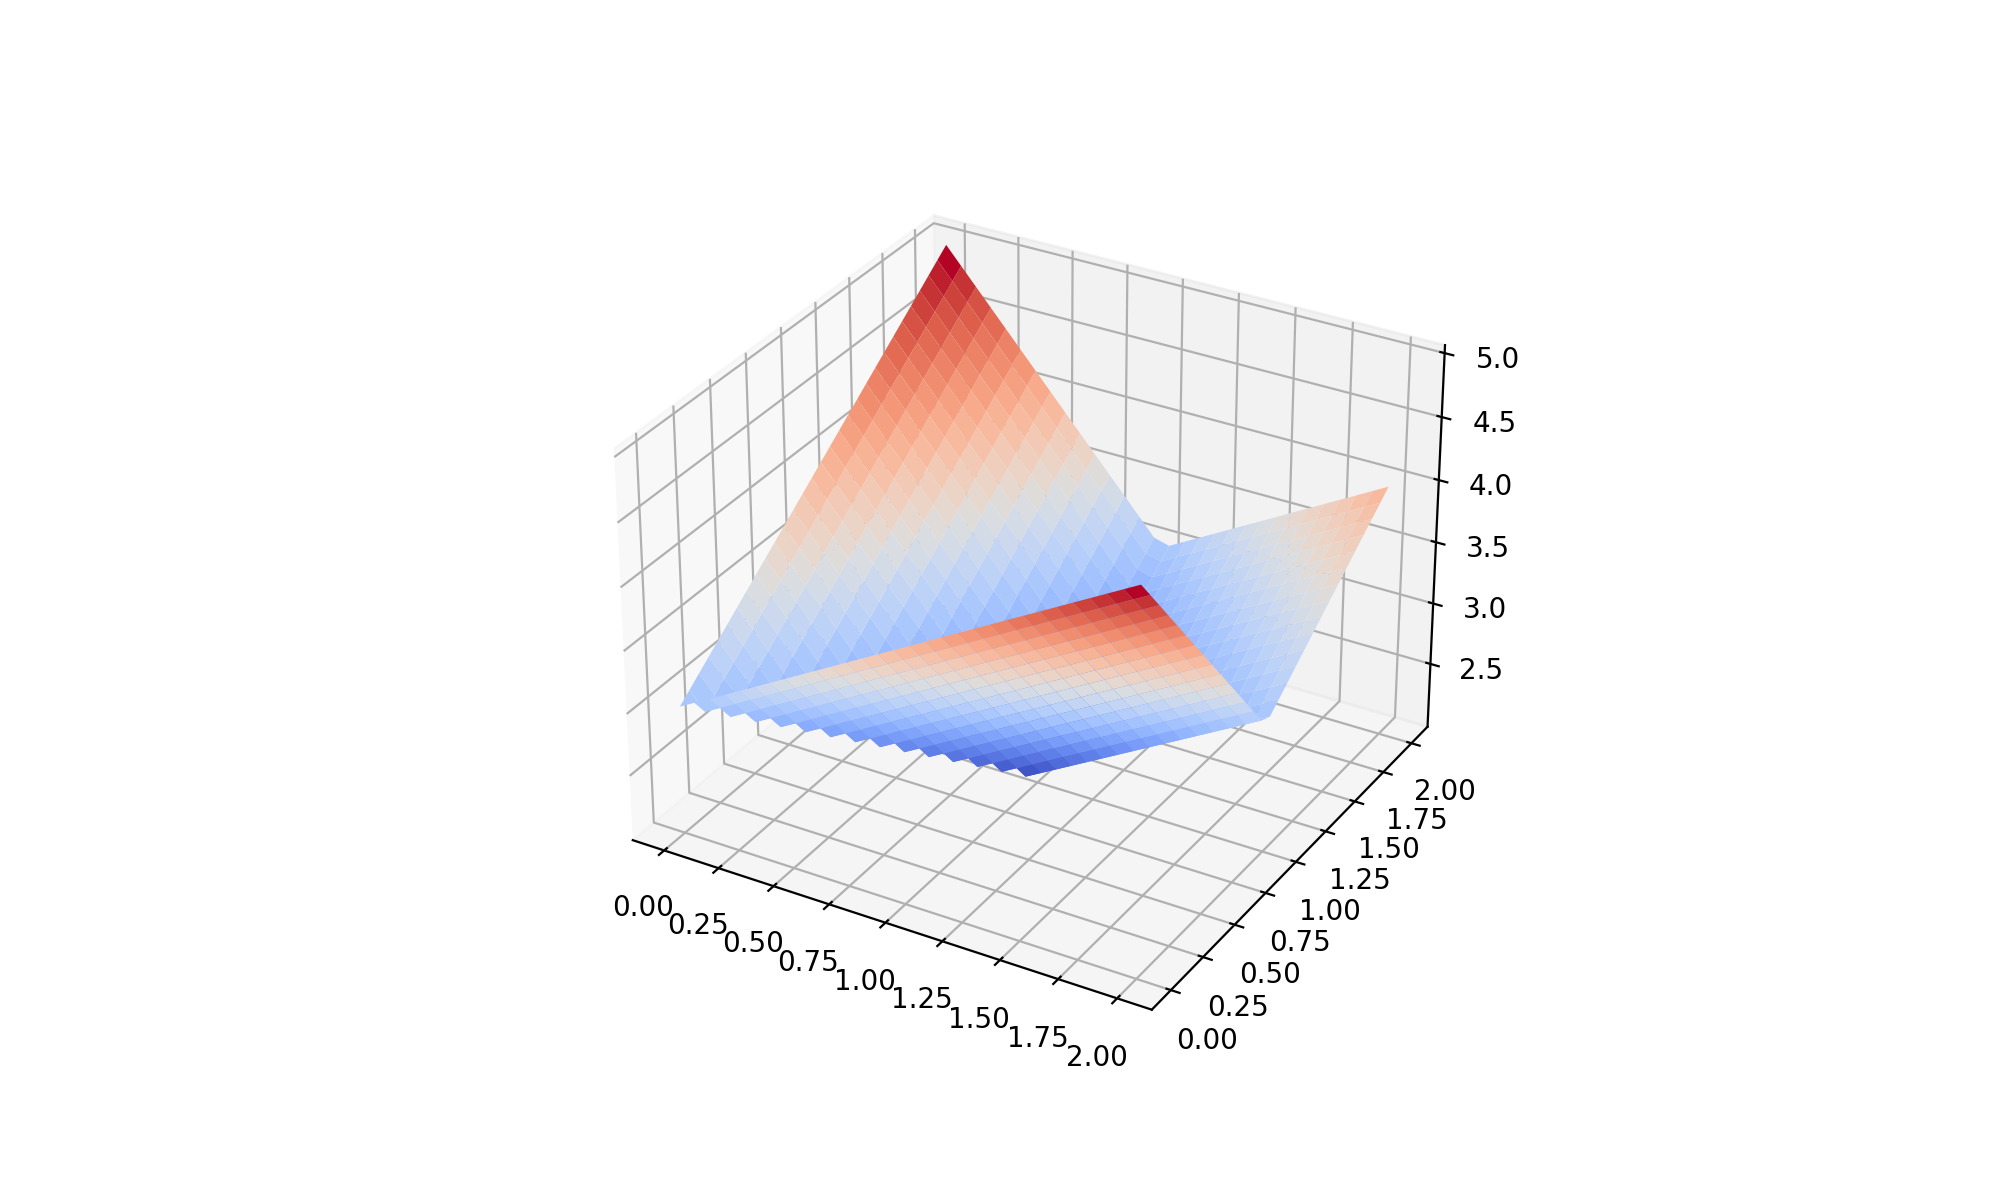

In [51]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def q(a, p):
    q = np.max(a - p, axis=1)
    return q.sum() + p.sum()

a = np.asarray([
    [1, 1, 0],
    [1, 1, 0],
    [1, 1, 0],
])

def q2(p1, p2):
    return q(a, np.asarray([p1, p2, 0]))

p1 = np.linspace(0, 2, 30)
p2 = np.linspace(0, 2, 30)
vq = np.asarray([[q2(pp1, pp2) for pp1 in p1] for pp2 in p2])
p1, p2 = np.meshgrid(p1, p2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5, 3))
ax.plot_surface(p1, p2, vq, cmap=cm.coolwarm)

<IPython.core.display.Javascript object>


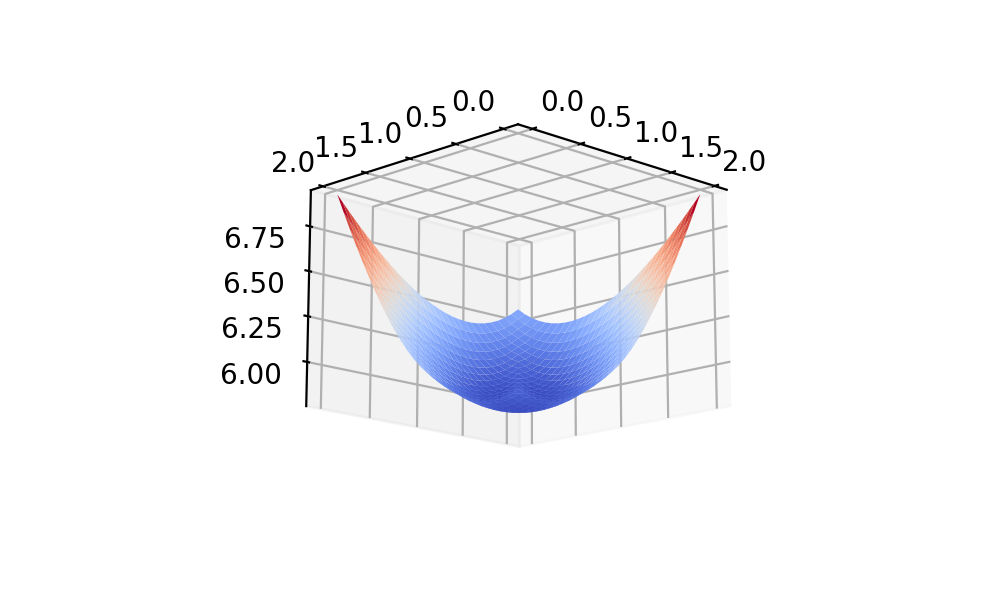

In [70]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


def c(a, p):
    q = np.max(a - p, axis=1)
    return q.sum() + p.sum() + np.sum(f(a - q[:, np.newaxis] - p[np.newaxis, :]))

def c2(p1, p2):
    return c(a, np.asarray([p1, p2, 0]))

def f(x):
    return np.exp(x + 1 / 4) / 3

p1 = np.linspace(0, 2, 30)
p2 = np.linspace(0, 2, 30)
vq = np.asarray([[c2(pp1, pp2) for pp1 in p1] for pp2 in p2])
p1, p2 = np.meshgrid(p1, p2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5, 3))
ax.plot_surface(p1, p2, vq, cmap=cm.coolwarm)

## <a name="auction-p"></a> The auction algorithm for the shortest path problem

An [auction-like algorithm](https://www.mit.edu/~dimitrib/Auctionsp.pdf) exists for shortest path problems on graphs.

Let $N$ be a set of nodes and $A \subset N^2$ be a set of (directed) arcs. We assume there are no cycles. Let $a_{ij} > 0$ be the length of arc $(i, j)$. The goal is to find a shortest path from the source $s$ to the destination $d$.

Consider the assignment problem where the persons are every node except $d$ and the objects are every node except $s$. The cost for assigning person $i$ to object $j$ is defined the following way:
1. If $i = j$, the cost is $0$
2. If $(i, j) \in A$ the cost is $a_{ij}$
3. Otherwise the cost is infinite

Running the naive auction algorithm (with some small modifications) initialized with the partial assignment $i \to i$ for all $i \neq s, d$ gives a shortest path algorithm.

Indeed consider a feasible solution to the assignment problem:
1. $s$ must be assigned to an object $i \neq s$
2. But then person $i$ cannot be assigned to object $i$ (it's taken) and must be assigned to some object $j$
3. ...
4. Until we stumble upon $d$

The unseen persons are assigned to themselves. All solutions are paths from $s$ to $d$, and the one of least cost is of course the shortest path.

The algorithm maintains:
1. a path $P$ in the form $(s, i_1, i_2, ..., i_k)$
2. a price $p_j$ for each node $j$ of the graph.

During the execution of the algorithm the following conditions hold true:
1. For all $(i, j) \in A$, $p_i - p_j \leq a_{ij}$
2. For all $i, j$ consecutive nodes in $P$, $p_i - p_j = a_{ij}$

These invariants are in fact the complementary slackness conditions for the minimum cost flow linear program associated to the shortest path problem.

Some immediate observations:
1. For all $i, j \in N$, $p_i - p_j$ is inferior or equal to the shortest distance between $i$ and $j$
2. Therefore the path $P$ is a shortest path from $s$ to its terminal node

The invariants are very powerful !

We must find an algorithm which maintains these invariants and eventually extends $P$ to contain the destination $d$. Once $d$ is the terminal node of $P$, the observations above imply $P$ is the shortest path from $s$ to $d$.

### Shortest path auction

1. Set $P = (s)$ and $p_j = 0$ for all $j$
2. Until the terminal node of $P$ is $s$, do:
    1. Let $i$ be the terminal node of $P$
    2. Let $j = \text{arg} \min_k a_{ik} + p_k$
    3. If $p_i = a_{ij} + p_j$, extend $P$ with $j$
    4. Otherwise set $p_i = a_{ij} + p_j$ and additionally, if $i \neq s$, remove $i$ from $P$

In [6]:
import numpy as np

def spauction(adj, f, t):
    path = [f]
    p = np.zeros(len(adj)).astype(float)

    while path[-1] != t:
        i = path[-1]
        j = np.argmin(adj[i] + p)
        
        if p[i] < adj[i, j] + p[j]:
            p[i] = adj[i, j] + p[j]
            if i != f:
                path.pop()
        else:
            path.append(j)
    
    return path

In [9]:
adj = np.asarray([
    [np.inf, 1, np.inf, 1],
    [np.inf, np.inf, 1, 1],
    [1, 1, np.inf, 1],
    [np.inf, np.inf, np.inf, np.inf],
])

spauction(adj, 0, 3)

[0, 3]